## Importing packages

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(palette='deep')

## Loading in data

In [113]:
df = pd.read_csv("data/Sleep_health_and_lifestyle_dataset.csv", index_col='Person ID')
print(df.shape)
df.head()

(374, 12)


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


- `Quality of Sleep` will be the principal outcome column.
- The only column with NaN values is `Sleep Disorder` - many people don't have a sleep disorder.

## Cleaning data
### 1. Check for and remove/impute/leave missing values.

In [115]:
df.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [116]:
prop_sleep_d_null = ((df['Sleep Disorder'].isnull().sum() / df.shape[0]) * 100).round(2)
prop_sleep_d_null

58.56

- Again, the only column with null values is `Sleep Disorder`, which has 219 null values, or 58.56%.
- As these values indicate 'no sleep disorder', I will leave them as they are.

### 2. Check for and remove duplicate entries.

In [117]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

df_with_duplicates = df.copy()
df = df.drop_duplicates()

print(f"\nThe original dataset had {df_with_duplicates.shape[0]} entries, but with 242 duplicates.\
\nWith the duplicates removed, the dataset now has {df.shape[0]} rows.")


242

The original dataset had 374 entries, but with 242 duplicates.
With the duplicates removed, the dataset now has 132 rows.


- There are 242 duplicates - but this must be because the dataset is synthetic. I will remove them anyway.

## Create new columns

In [118]:
# Create age bracket column
def get_age_bracket(age):
    if age < 30:
        return '25-29'
    elif age < 35:
        return '30-34'
    elif age < 40:
        return '35-39'
    elif age < 45:
        return '40-44'
    elif age < 50:
        return '45-49'
    elif age < 55:
        return '50-54'
    else:
        return '55-59'
    
df['Age Bracket'] = df['Age'].apply(get_age_bracket)

In [119]:
# Age in larger brackets - for easier plotting later
def get_age_bracket(age):
    if age <  35:
        return '25-34'
    elif age < 50:
        return '35-49'
    else:
        return '50-59'
    
df['Wide Age Bracket'] = df['Age'].apply(get_age_bracket)

In [120]:
# Blood pressure values converted into categories
def get_blood_pressure_cat(bp):
    systolic_bp = int(bp.split(sep='/')[0])
    diastolic_bp = int(bp.split(sep='/')[1])
    if systolic_bp < 90 and diastolic_bp < 60:
        return 'Low'
    elif systolic_bp < 120 and diastolic_bp < 80:
        return 'Ideal'
    elif systolic_bp < 140 and diastolic_bp < 90:
        return 'Pre-high'
    else:
        return 'High'
    
df['Blood Pressure Category'] = df['Blood Pressure'].apply(get_blood_pressure_cat)

In [121]:
df['BMI Category'].value_counts()

BMI Category
Normal           57
Overweight       52
Normal Weight    16
Obese             7
Name: count, dtype: int64

In [122]:
# Change values in BMI Category column - 'Normal' and 'Normal Weight' mean the same thing
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')
df['BMI Category'].value_counts()

BMI Category
Normal        73
Overweight    52
Obese          7
Name: count, dtype: int64

## Examine descriptive statistics

In [123]:
desc_stats_num = df.describe()
desc_stats_num

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,41.128788,7.082576,7.151515,58.393939,5.537879,71.204545,6637.878788
std,8.813942,0.775335,1.269037,20.468840,1.740428,4.867306,1766.288657
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,33.750000,6.400000,6.000000,44.250000,4.000000,68.000000,5000.000000
50%,41.000000,7.150000,7.000000,60.000000,6.000000,70.000000,7000.000000
75%,49.000000,7.725000,8.000000,75.000000,7.000000,74.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [124]:
desc_stats_cat = df.describe(include='O')
desc_stats_cat

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder,Age Bracket,Wide Age Bracket,Blood Pressure Category
count,132,132,132,132,59,132,132,132
unique,2,11,3,25,2,7,3,3
top,Male,Nurse,Normal,130/85,Sleep Apnea,35-39,35-49,Pre-high
freq,67,29,73,28,30,29,69,84


## Visualise the data
### Outliers

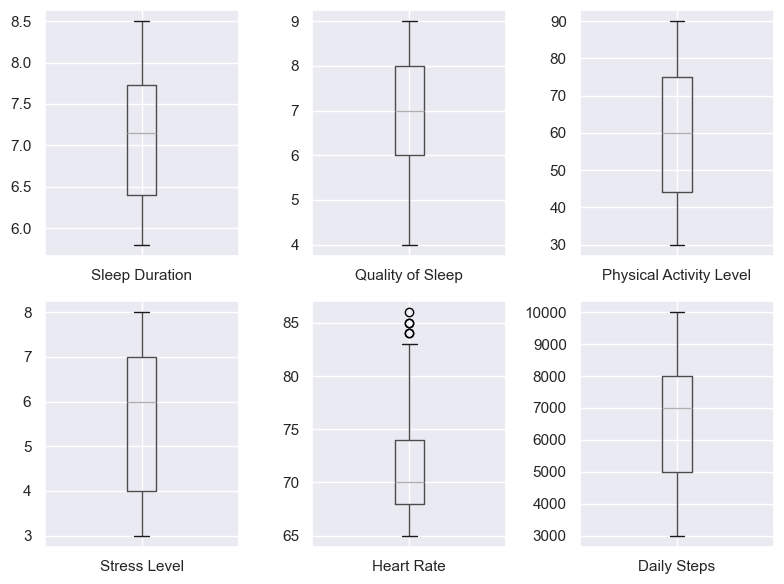

In [125]:
# Boxplots to find outliers
num_variables_list = [col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64']
num_variables_list.remove('Age')
num_variables_list

fig, ax = plt.subplots(2,3, figsize=(8,6))
for variable, subplot in zip(num_variables_list, ax.flatten()):
    df.boxplot(column=variable, ax=subplot)
plt.tight_layout()

- There are 3 potential outliers for heart rate. They are not dramatically different though, so I won't remove them.
    - But if I were to, I would check the highest values of heart rate with:

In [126]:
df.sort_values(by='Heart Rate', ascending=False).head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Bracket,Wide Age Bracket,Blood Pressure Category
Person ID,,,,,,,,,,,,,,,
277,Male,49,Doctor,8.1,9,85,3,Obese,139/91,86,3700,Sleep Apnea,45-49,35-49,High
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,25-29,25-34,High
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,25-29,25-34,High
94,Male,35,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea,35-39,35-49,Pre-high
146,Female,38,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea,35-39,35-49,Pre-high
265,Male,48,Doctor,7.3,7,65,5,Obese,142/92,83,3500,Insomnia,45-49,35-49,High
7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,25-29,25-34,High
81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea,30-34,25-34,Pre-high
148,Male,39,Engineer,6.5,5,40,7,Overweight,132/87,80,4000,Insomnia,35-39,35-49,Pre-high


- ... And then I would remove the entries with highest values for heart rate with: 
```Python
df = df[df['Heart Rate'] < 84]
```
- As there are no extreme outliers, I will leave the dataset as it is.

### Demographics - Gender

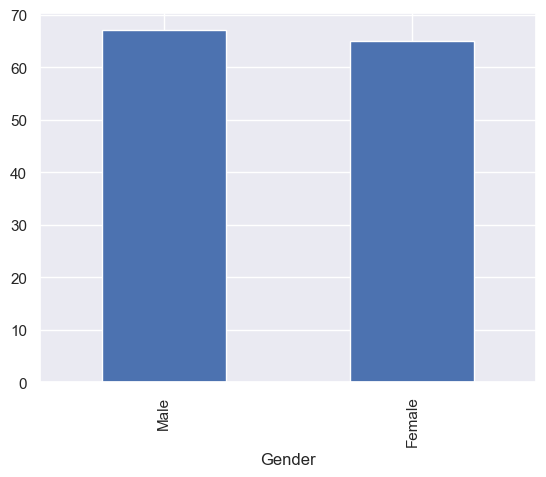

In [127]:
# Bar chart for gender distribution
df['Gender'].value_counts().plot(kind='bar');

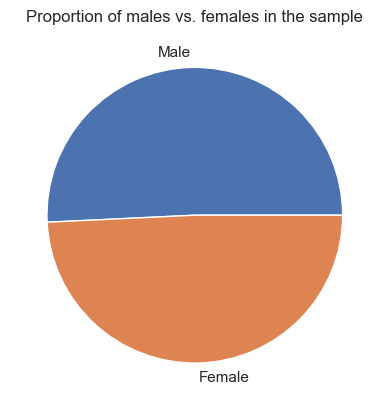

In [128]:
# Or a pie chart to show gender distribution
df['Gender'].value_counts().plot(kind='pie')
plt.title("Proportion of males vs. females in the sample")
plt.ylabel('');

In [129]:
df['Gender'].value_counts().reset_index()

,Gender,count
0,Male,67
1,Female,65


### Demographics - Age

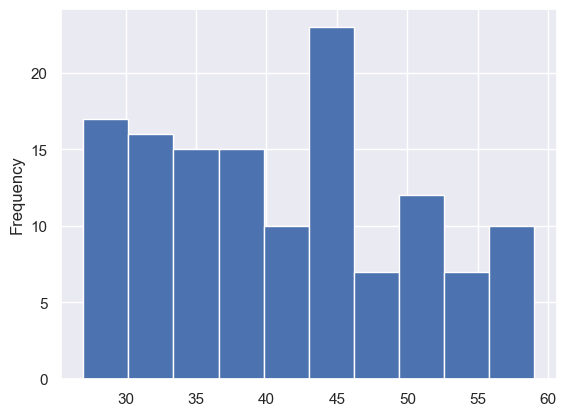

In [130]:
# Histogram with arbitrary bins is not massively informative
df['Age'].plot(kind='hist', bins=10);

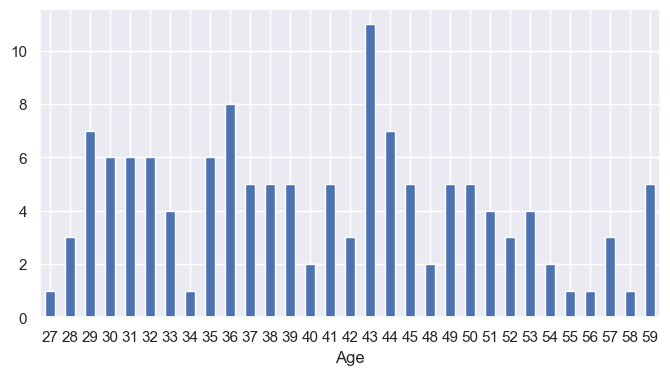

In [131]:
# Could use a bar chart that shows the value for each exact age
plt.figure(figsize=(8,4))
df['Age'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0);

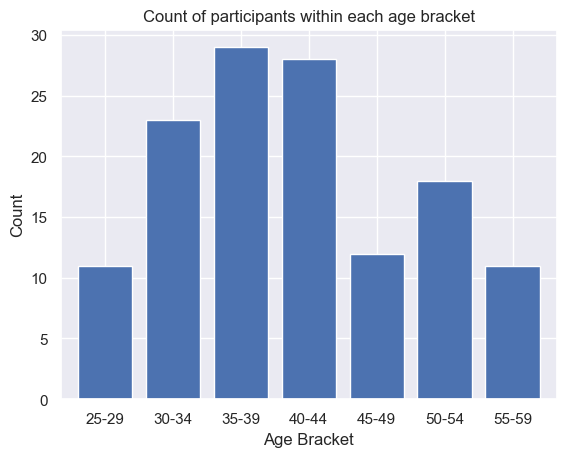

In [132]:
# Or a histogram showing the age in more meaningful bins
df['Age Bracket'].value_counts().sort_index().plot(kind='bar', width=0.8)
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Count of participants within each age bracket");

In [133]:
df.groupby('Age Bracket')['Age'].count()

Age Bracket
25-29    11
30-34    23
35-39    29
40-44    28
45-49    12
50-54    18
55-59    11
Name: Age, dtype: int64

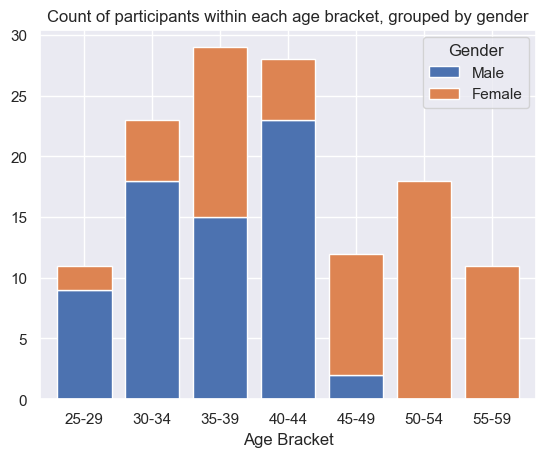

In [134]:
df.groupby(['Age Bracket', 'Gender'])['Age'].count().unstack()[['Male', 'Female']].plot(kind='bar', width=0.8, stacked=True)
plt.xticks(rotation=0)
plt.title("Count of participants within each age bracket, grouped by gender");

# Note, the code [['Male', 'Female']] is there to make the male group blue,
# to match the pie chart & keep consistency.

In [135]:
df.groupby(['Age Bracket', 'Gender'])['Age'].count().unstack()

Gender,Female,Male
Age Bracket,,
25-29,2.0,9.0
30-34,5.0,18.0
35-39,14.0,15.0
40-44,5.0,23.0
45-49,10.0,2.0
50-54,18.0,NaN
55-59,11.0,NaN


In [136]:
df.groupby('Gender')['Age'].mean().round(2)

Gender
Female    45.83
Male      36.57
Name: Age, dtype: float64

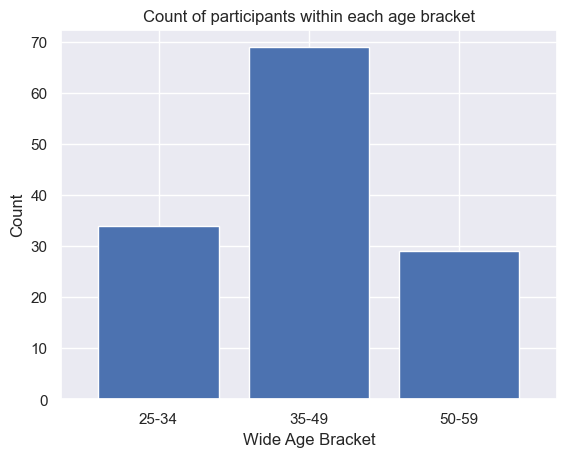

In [137]:
# Histogram of the wider age bins
df['Wide Age Bracket'].value_counts().sort_index().plot(kind='bar', width=0.8)
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Count of participants within each age bracket");

### Demographics - Occupation

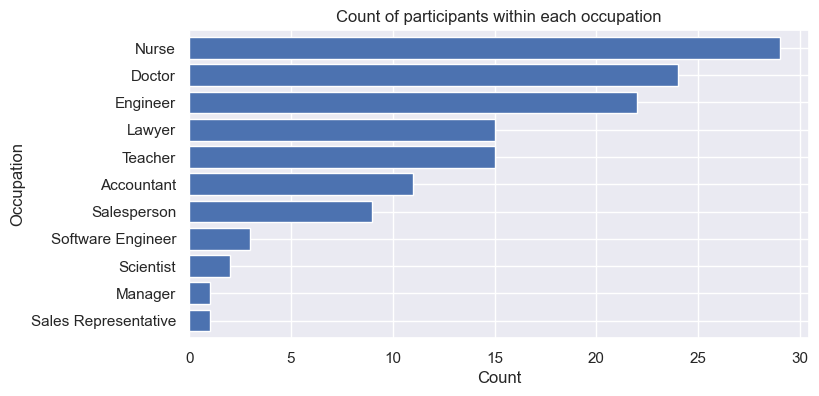

In [138]:
plt.figure(figsize=(8,4))
df['Occupation'].value_counts().sort_values().plot(kind='barh', width=0.8)
plt.xlabel("Count")
plt.title("Count of participants within each occupation");

In [139]:
df['Occupation'].value_counts().sort_values(ascending=False).reset_index()

,Occupation,count
0,Nurse,29
1,Doctor,24
2,Engineer,22
3,Teacher,15
4,Lawyer,15
5,Accountant,11
6,Salesperson,9
7,Software Engineer,3
8,Scientist,2
9,Sales Representative,1


## Visualising outcome measures - sleep duration & quality

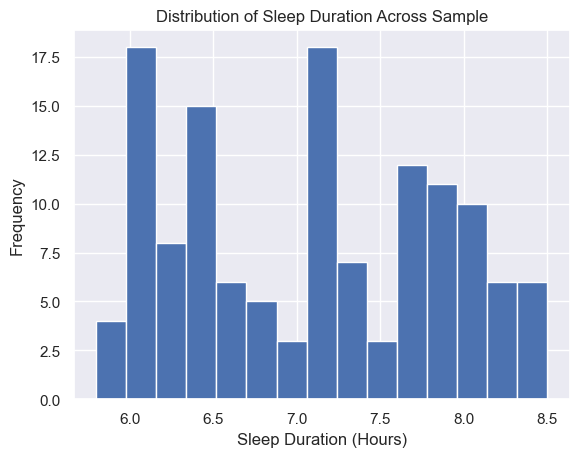

In [140]:
df['Sleep Duration'].plot(kind='hist', bins=15)
plt.xlabel("Sleep Duration (Hours)")
plt.title("Distribution of Sleep Duration Across Sample");

In [141]:
df['Sleep Duration'].value_counts().sort_index()

Sleep Duration
5.8     1
5.9     3
6.0     9
6.1     9
6.2     5
6.3     3
6.4     5
6.5    10
6.6     6
6.7     2
6.8     3
6.9     3
7.1     7
7.2    11
7.3     4
7.4     3
7.5     3
7.6     6
7.7     6
7.8     8
7.9     3
8.0     4
8.1     6
8.2     3
8.3     3
8.4     3
8.5     3
Name: count, dtype: int64

<Axes: xlabel='Sleep Duration'>

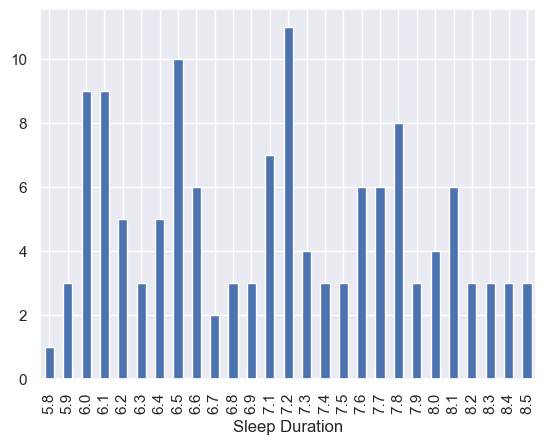

In [142]:
df['Sleep Duration'].value_counts().sort_index().plot(kind='bar')

In [143]:
# I feel like it is easier to understand the visualisation of sleep distribution
# when the scores are grouped into brackets.
def get_sleep_d_bracket(duration):
    if duration < 6:
        return '5.5-5.9'
    elif duration < 6.5:
        return '6.0-6.4'
    elif duration < 7:
        return '6.5-6.9'
    elif duration < 7.5:
        return '7.0-7.4'
    elif duration < 8:
        return '7.5-7.9'
    elif duration < 8.5:
        return '8.0-8.4'
    else:
        return '8.5-9.0'

df['Sleep Duration Bracket'] = df['Sleep Duration'].apply(get_sleep_d_bracket)

In [144]:
df['Sleep Duration Bracket'].value_counts().sort_index()

Sleep Duration Bracket
5.5-5.9     4
6.0-6.4    31
6.5-6.9    24
7.0-7.4    25
7.5-7.9    26
8.0-8.4    19
8.5-9.0     3
Name: count, dtype: int64

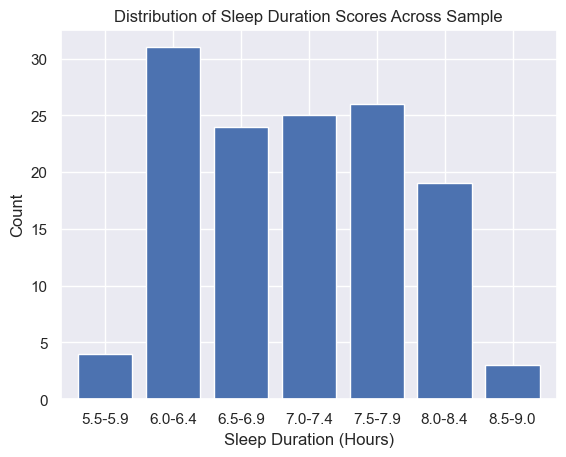

In [145]:
df['Sleep Duration Bracket'].value_counts().sort_index().plot(kind='bar', width=0.8)
plt.ylabel("Count")
plt.xlabel("Sleep Duration (Hours)")
plt.xticks(rotation=0)
plt.title("Distribution of Sleep Duration Scores Across Sample");

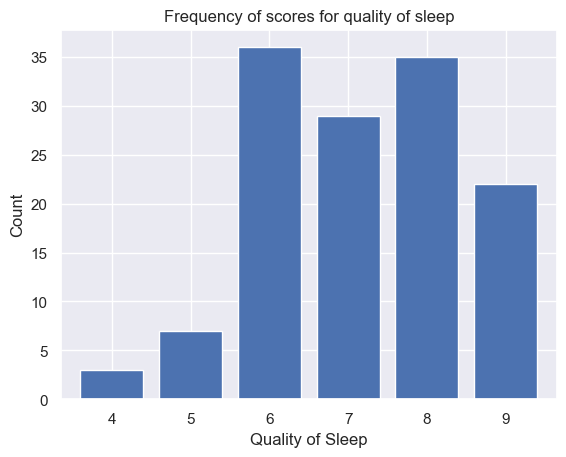

In [146]:
df['Quality of Sleep'].value_counts().sort_index().plot(kind='bar', width=0.8)
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Frequency of scores for quality of sleep");

In [147]:
df[df['Quality of Sleep'] > 5].shape[0]/df.shape[0]

0.9242424242424242

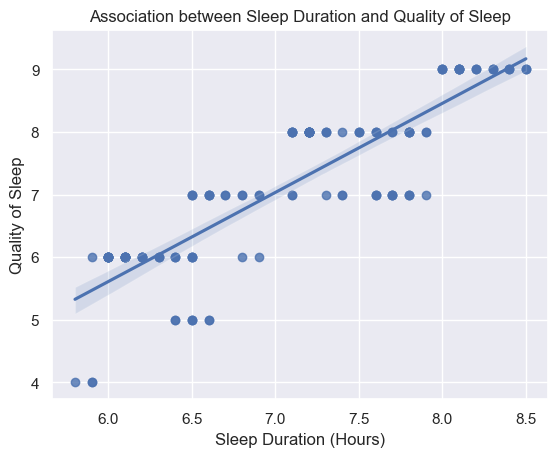

In [148]:
# Correlation between the 2 outcome measures
sns.regplot(x='Sleep Duration', y='Quality of Sleep', data=df)
plt.title("Association between Sleep Duration and Quality of Sleep")
plt.xlabel("Sleep Duration (Hours)");

## Visualising relationship between outcomes & demographic variables
### Quality of sleep vs. Gender

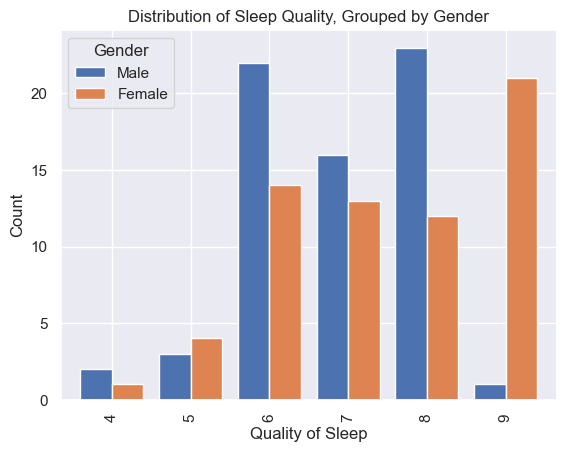

In [149]:
df.groupby(['Quality of Sleep', 'Gender'])['Quality of Sleep'].count().unstack()[['Male', 'Female']].plot(kind='bar', width=0.8)
plt.title("Distribution of Sleep Quality, Grouped by Gender")
plt.ylabel("Count");

In [150]:
df.groupby(['Quality of Sleep', 'Gender'])['Quality of Sleep'].count().unstack()[['Male', 'Female']]

Gender,Male,Female
Quality of Sleep,,
4,2,1
5,3,4
6,22,14
7,16,13
8,23,12
9,1,21


In [151]:
df.groupby('Gender')['Quality of Sleep'].mean().round(2)

Gender
Female    7.45
Male      6.87
Name: Quality of Sleep, dtype: float64

- People with low quality sleep (4-5) are relatively evenly split by gender.
- A slightly higher proportion of people with middle-high quality sleep (6-8) are male than female.
- An overwhelming majority of people with very high quality sleep (9) are female

### Duration of sleep vs. Gender

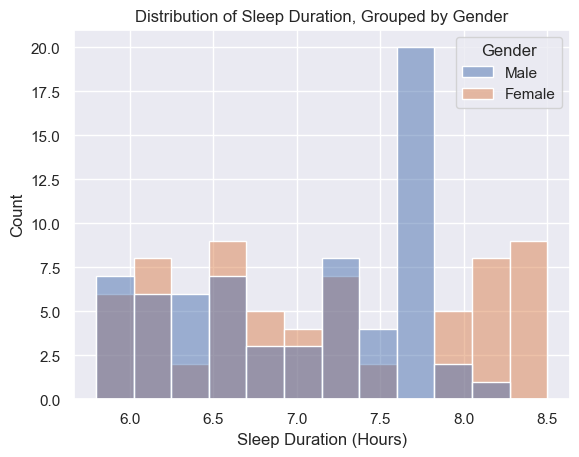

In [152]:
sns.histplot(x='Sleep Duration', hue='Gender', data=df, bins=12, hue_order = ['Male', 'Female'])
plt.xlabel("Sleep Duration (Hours)")
plt.title("Distribution of Sleep Duration, Grouped by Gender");

In [153]:
df.groupby('Gender')['Sleep Duration'].agg(['mean', 'std', 'min', 'max']).round(2)

,mean,std,min,max
Gender,,,,
Female,7.15,0.86,5.8,8.5
Male,7.01,0.68,5.9,8.1


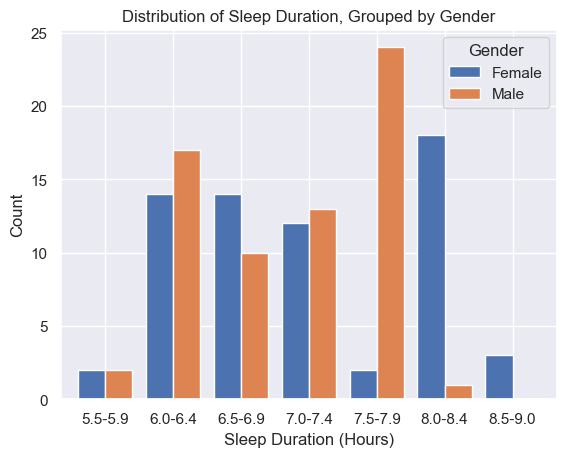

In [154]:
df.groupby(['Sleep Duration Bracket', 'Gender'])['Sleep Duration Bracket'].count().unstack().plot(kind='bar', width=0.8)
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.xlabel("Sleep Duration (Hours)")
plt.title("Distribution of Sleep Duration, Grouped by Gender");

### Quality of Sleep vs. Age

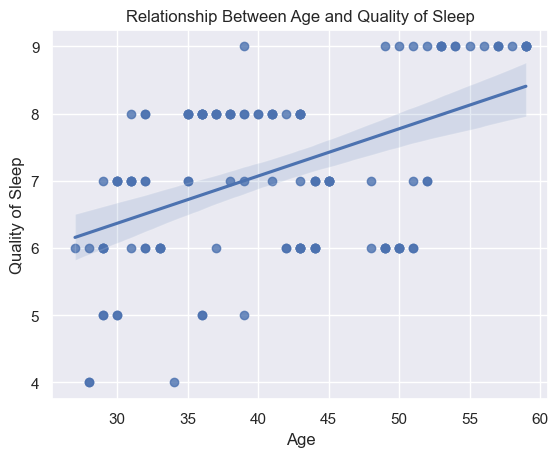

In [155]:
sns.regplot(x=df['Age'], y=df['Quality of Sleep'])
plt.title("Relationship Between Age and Quality of Sleep");

- Quality of sleep is positively correlated with age. Almost all people with the highest quality of sleep (9) are over 50.

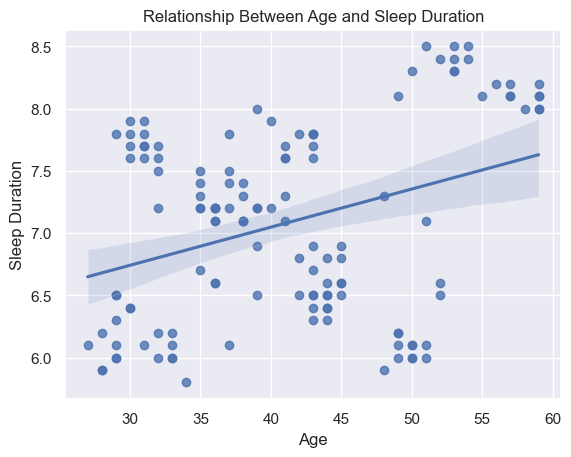

In [156]:
sns.regplot(x=df['Age'], y=df['Sleep Duration'])
plt.title("Relationship Between Age and Sleep Duration");

- Age is positively correlated with sleep duration too. Almost all people who sleep over 8 hours are over 50.

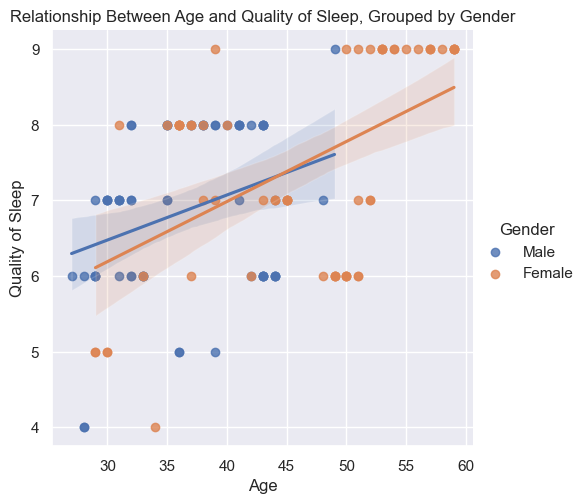

In [157]:
sns.lmplot(x='Age', y='Quality of Sleep', hue='Gender', data=df)
plt.title("Relationship Between Age and Quality of Sleep, Grouped by Gender");

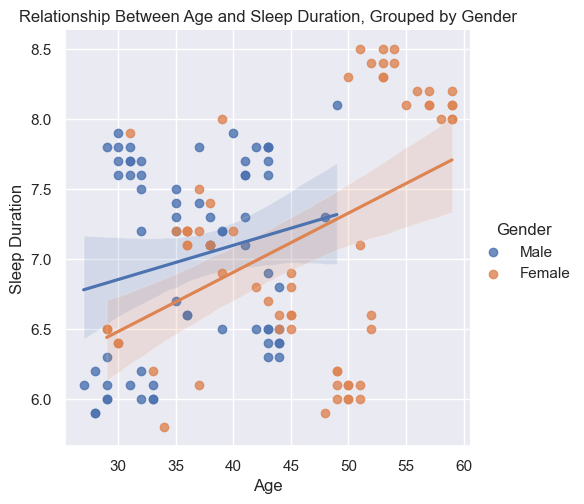

In [158]:
sns.lmplot(x='Age', y='Sleep Duration', hue='Gender', data=df)
plt.title("Relationship Between Age and Sleep Duration, Grouped by Gender");

- The relationship between sleep duration & quality and gender may be influenced by age: there appears to be a stronger positive correlation between sleep duration/quality and age for females than for males, but this may be due to the presence of females older than 50 in the sample (whereas there are no males older than 50 in the sample); it could be that this older group of people (above 50) tend to have higher sleep duration/quality, and this is skewing the values for the female group.

- You would need to sample more participants such that there are similar age distributions between males and females in order to determine whether gender mediates the relationship between age and sleep quality/duration.

### Quality & Duration of Sleep vs Occupation

In [159]:
median_sleep_q_by_occ = df.groupby('Occupation')['Quality of Sleep'].median().sort_values(ascending=False)
median_sleep_q_by_occ

Occupation
Accountant              8.0
Engineer                8.0
Lawyer                  8.0
Doctor                  7.0
Manager                 7.0
Teacher                 7.0
Nurse                   6.0
Salesperson             6.0
Software Engineer       6.0
Scientist               5.0
Sales Representative    4.0
Name: Quality of Sleep, dtype: float64

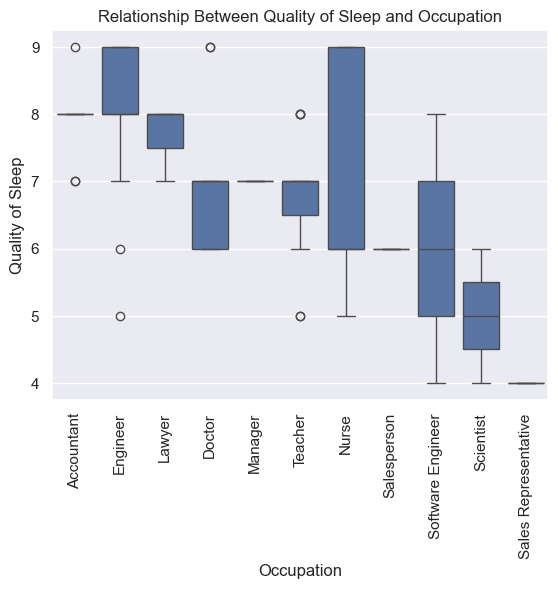

In [160]:
sns.boxplot(x='Occupation', y='Quality of Sleep', data=df, order=median_sleep_q_by_occ.index)
plt.xticks(rotation=90)
plt.title("Relationship Between Quality of Sleep and Occupation");

In [161]:
median_sleep_d_by_occ = df.groupby('Occupation')['Sleep Duration'].median().sort_values(ascending=False)
median_sleep_d_by_occ

Occupation
Engineer                7.8
Doctor                  7.6
Lawyer                  7.4
Accountant              7.2
Manager                 6.9
Teacher                 6.6
Nurse                   6.5
Salesperson             6.4
Software Engineer       6.1
Scientist               6.0
Sales Representative    5.9
Name: Sleep Duration, dtype: float64

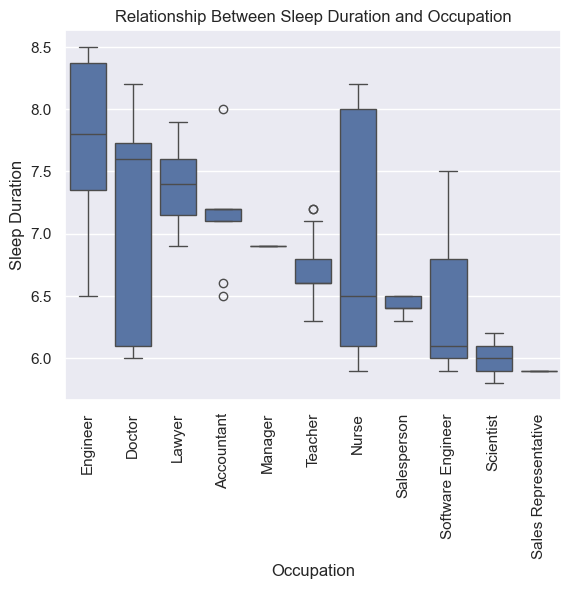

In [162]:
sns.boxplot(x='Occupation', y='Sleep Duration', data=df, order=median_sleep_d_by_occ.index)
plt.xticks(rotation=90)
plt.title("Relationship Between Sleep Duration and Occupation");

### Quality & Duration of sleep vs. (continuous) Exercise variables

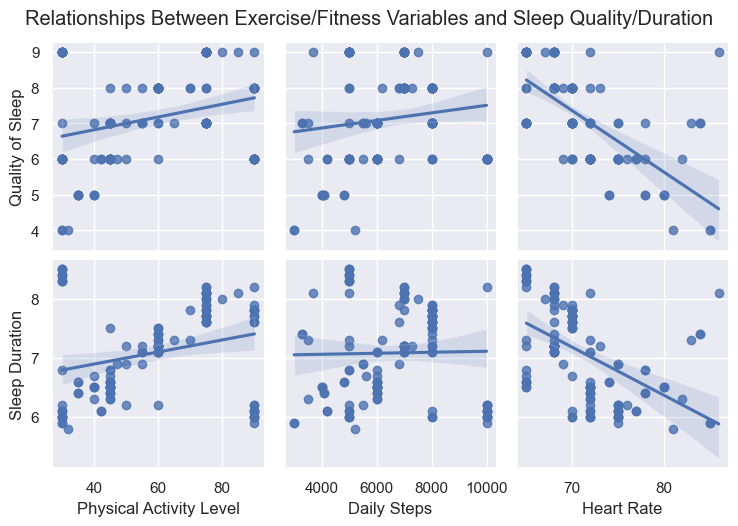

In [163]:
sns.pairplot(x_vars=['Physical Activity Level', 'Daily Steps', 'Heart Rate'],
            y_vars=['Quality of Sleep', 'Sleep Duration'],
            kind='reg',
            data=df)
plt.suptitle("Relationships Between Exercise/Fitness Variables \
and Sleep Quality/Duration", y=1.04);

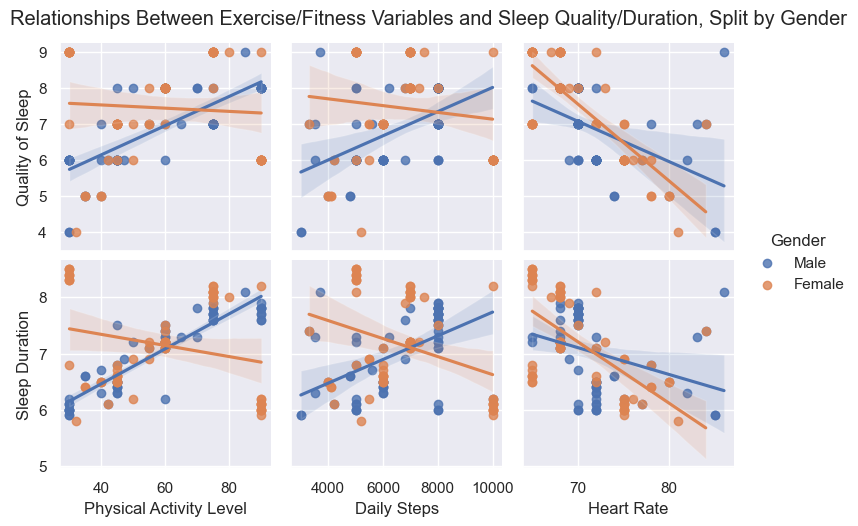

In [164]:
sns.pairplot(x_vars=['Physical Activity Level', 'Daily Steps', 'Heart Rate'],
            y_vars=['Quality of Sleep', 'Sleep Duration'],
            kind='reg',
            hue='Gender',
            data=df)
plt.suptitle("Relationships Between Exercise/Fitness Variables and Sleep Quality/Duration,\
 Split by Gender", y=1.04);

''

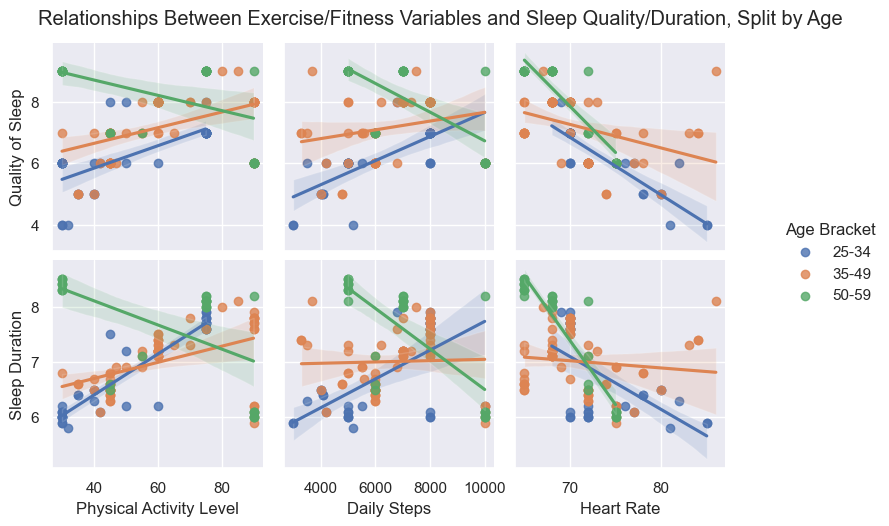

In [165]:
sns.pairplot(x_vars=['Physical Activity Level', 'Daily Steps', 'Heart Rate'],
            y_vars=['Quality of Sleep', 'Sleep Duration'],
            kind='reg',
            hue='Wide Age Bracket',
            data=df)._legend.set_title("Age Bracket")
plt.suptitle("Relationships Between Exercise/Fitness Variables and Sleep Quality/Duration,\
 Split by Age", y=1.04)
;

### Quality & Duration of sleep vs. (categorical) Exercise variables

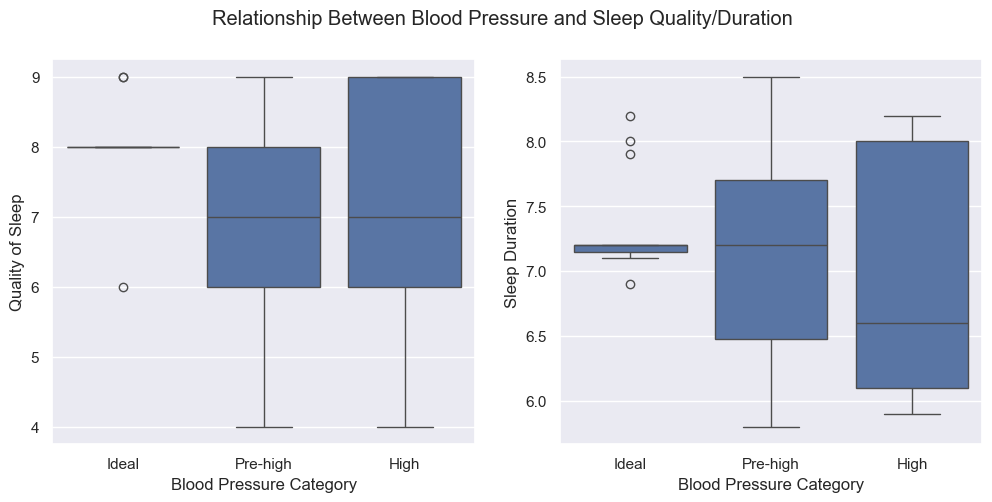

In [166]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(x='Blood Pressure Category', y='Quality of Sleep', data=df, ax=ax[0],
           order=['Ideal', 'Pre-high', 'High'])
sns.boxplot(x='Blood Pressure Category', y='Sleep Duration', data=df, ax=ax[1],
           order=['Ideal', 'Pre-high', 'High'])
fig.suptitle("Relationship Between Blood Pressure and Sleep Quality/Duration");

In [167]:
df.groupby('Blood Pressure Category')[['Quality of Sleep', 'Sleep Duration']].mean().round(2).reindex(['Ideal', 'Pre-high', 'High'])

,Quality of Sleep,Sleep Duration
Blood Pressure Category,,
Ideal,8.00,7.33
Pre-high,7.01,7.11
High,7.12,6.89


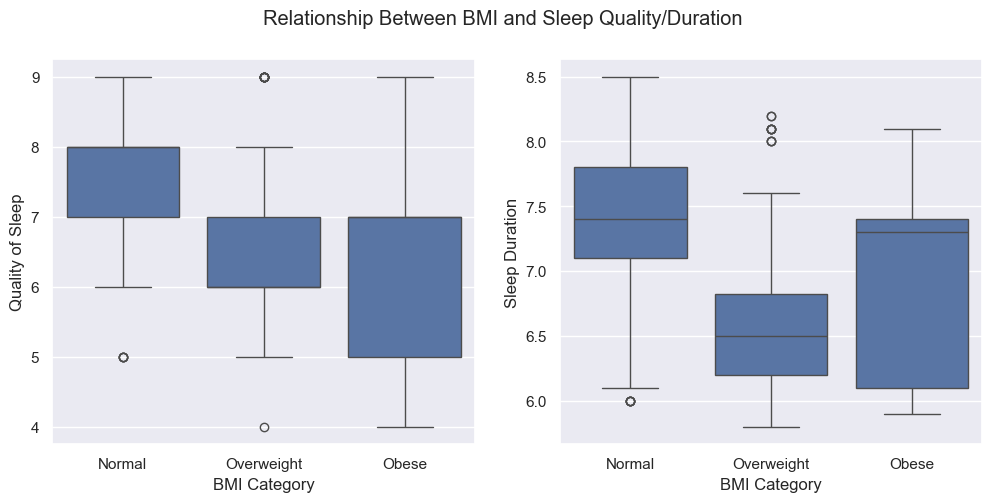

In [168]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(x='BMI Category', y='Quality of Sleep', data=df,
           order=['Normal', 'Overweight', 'Obese'], ax=ax[0])
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df,
           order=['Normal', 'Overweight', 'Obese'], ax=ax[1])
fig.suptitle("Relationship Between BMI and Sleep Quality/Duration");

In [169]:
df.groupby('BMI Category')[['Quality of Sleep', 'Sleep Duration']].mean().round(2).reindex(['Normal', 'Overweight', 'Obese'])

,Quality of Sleep,Sleep Duration
BMI Category,,
Normal,7.51,7.34
Overweight,6.77,6.74
Obese,6.29,6.90


### Sleep Quality & Duration vs. Stress

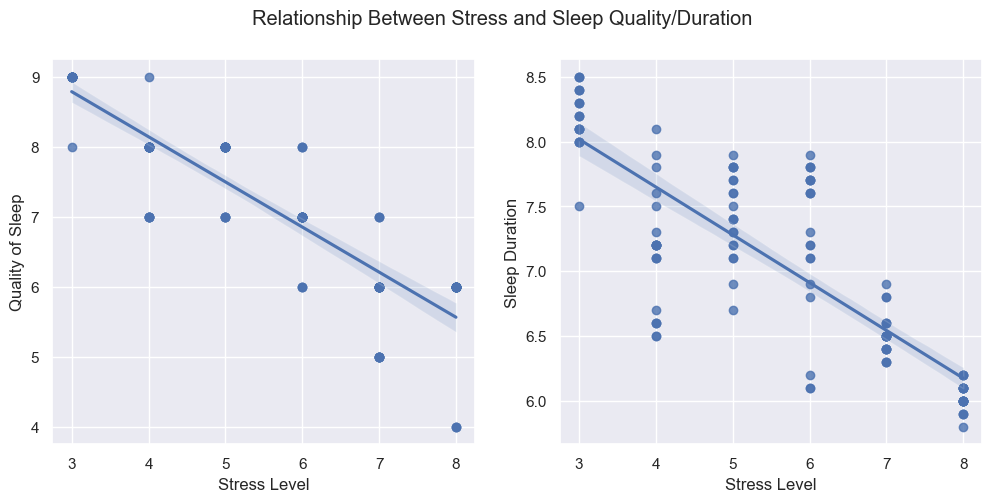

In [170]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.regplot(x='Stress Level', y='Quality of Sleep', data=df, ax=ax[0])
sns.regplot(x='Stress Level', y='Sleep Duration', data=df, ax=ax[1])
plt.suptitle("Relationship Between Stress and Sleep Quality/Duration");

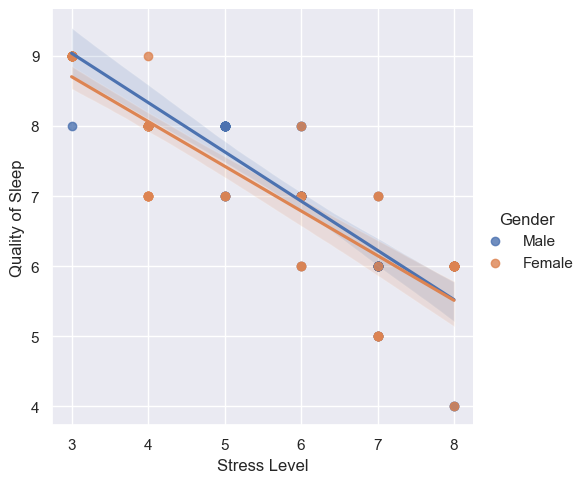

In [171]:
sns.lmplot(x='Stress Level', y='Quality of Sleep', hue='Gender', data=df);

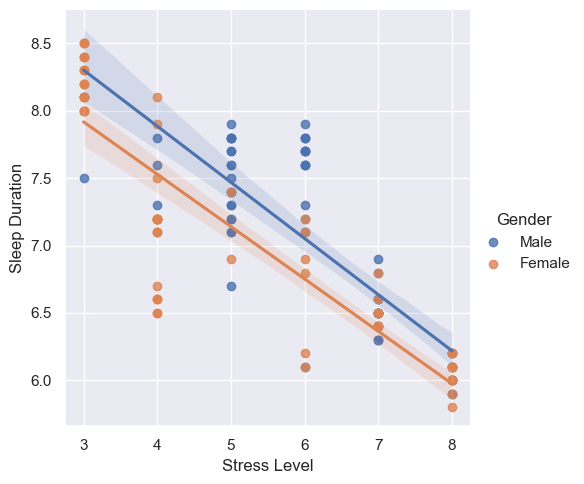

In [172]:
sns.lmplot(x='Stress Level', y='Sleep Duration', hue='Gender', data=df);

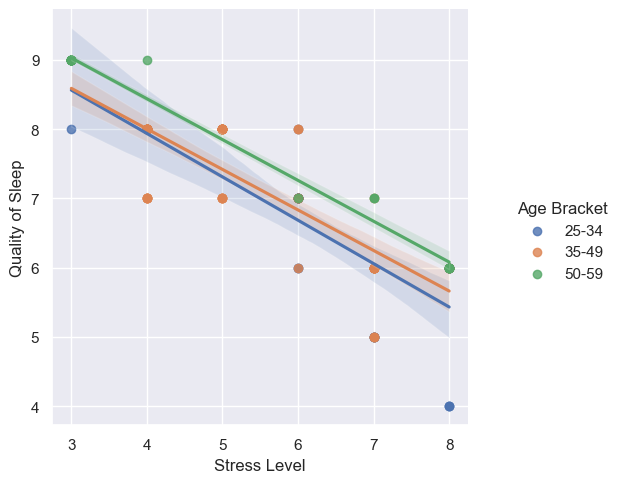

In [173]:
sns.lmplot(x='Stress Level', y='Quality of Sleep', hue='Wide Age Bracket', data=df)\
._legend.set_title("Age Bracket");

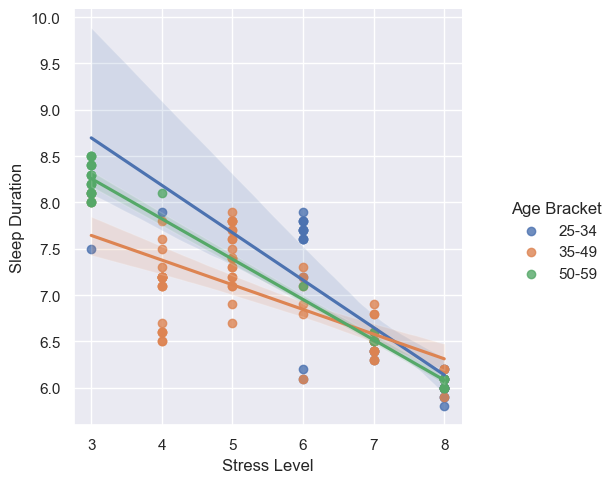

In [174]:
sns.lmplot(x='Stress Level', y='Sleep Duration', hue='Wide Age Bracket', data=df)\
._legend.set_title("Age Bracket");

## Sleep Quality & Duration vs. Sleep Disorders

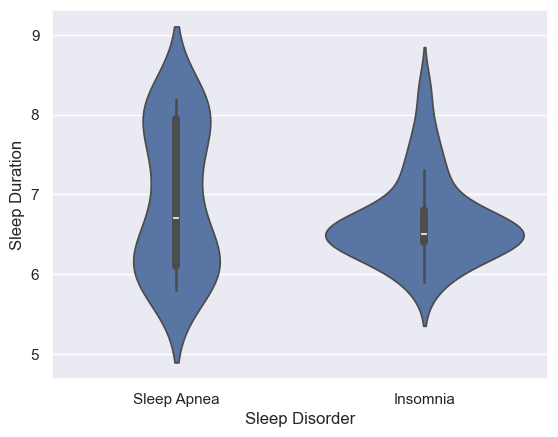

In [175]:
sns.violinplot(x='Sleep Disorder', y='Sleep Duration', data=df);

In [176]:
# Altering the 'Sleep Disorder' column so that those without a sleep disorder are shown in the graph
print(f"Number without a sleep disorder: {df['Sleep Disorder'].isna().sum()}")
print('\n',df['Sleep Disorder'].value_counts())

df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
display(pd.DataFrame(df['Sleep Disorder'].value_counts()))

Number without a sleep disorder: 73

 Sleep Disorder
Sleep Apnea    30
Insomnia       29
Name: count, dtype: int64


,count
Sleep Disorder,
None,73
Sleep Apnea,30
Insomnia,29


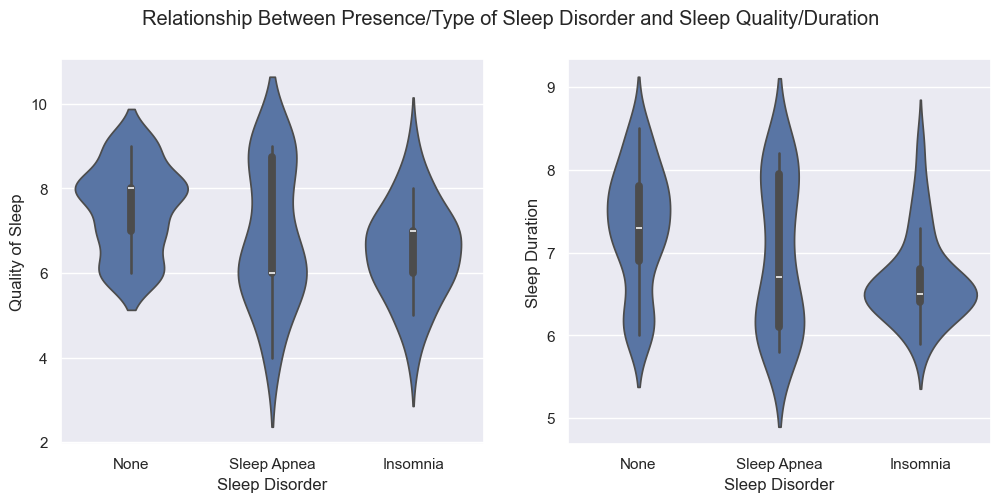

In [183]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.violinplot(x='Sleep Disorder', y='Quality of Sleep', data=df, ax=ax[0])
sns.violinplot(x='Sleep Disorder', y='Sleep Duration', data=df, ax=ax[1])
fig.suptitle("Relationship Between Presence/Type of Sleep Disorder and Sleep Quality/Duration");

In [181]:
df.groupby('Sleep Disorder')[['Quality of Sleep', 'Sleep Duration']].mean().round(2).reindex(['None', 'Insomnia', 'Sleep Apnea'])

,Quality of Sleep,Sleep Duration
Sleep Disorder,,
None,7.52,7.30
Insomnia,6.52,6.68
Sleep Apnea,6.87,6.94


In [182]:
df.groupby('Sleep Disorder')[['Quality of Sleep', 'Sleep Duration']].median().round(2).reindex(['None', 'Insomnia', 'Sleep Apnea'])

,Quality of Sleep,Sleep Duration
Sleep Disorder,,
None,8.0,7.3
Insomnia,7.0,6.5
Sleep Apnea,6.0,6.7


### Visualising Sleep Disorders, Split by Age & Gender

In [271]:
sd_df = df.groupby('Wide Age Bracket')['Sleep Disorder'].value_counts().unstack()\
[['None', 'Insomnia', 'Sleep Apnea']]
sd_df

Sleep Disorder,None,Insomnia,Sleep Apnea
Wide Age Bracket,,,
25-34,23,5,6
35-49,36,20,13
50-59,14,4,11


In [299]:
sd_df = df.groupby('Wide Age Bracket')['Sleep Disorder'].value_counts().unstack()\
[['None', 'Insomnia', 'Sleep Apnea']]
sd_df = sd_df.astype(float)
sd_df_perc = sd_df.copy()

for x in range(sd_df.shape[0]):
    for y in range(sd_df.shape[1]):
        sd_df_perc.iloc[x,y] = sd_df.iloc[x,y] / (sd_df.iloc[x].sum()) * 100

sd_df_perc.round(2)

Sleep Disorder,None,Insomnia,Sleep Apnea
Wide Age Bracket,,,
25-34,67.65,14.71,17.65
35-49,52.17,28.99,18.84
50-59,48.28,13.79,37.93


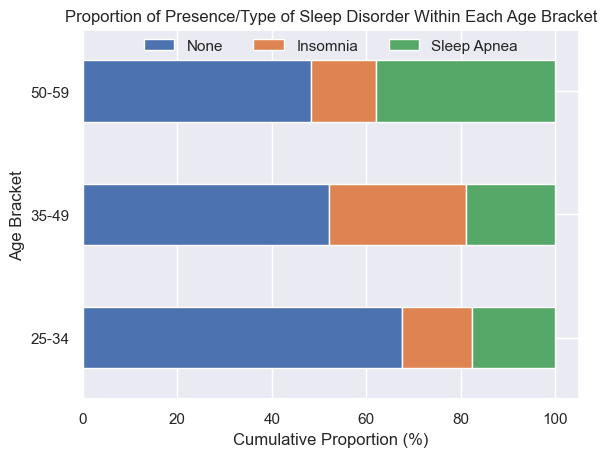

In [288]:
ax = sd_df_perc.plot(kind='barh', stacked=True)
plt.title("Proportion of Presence/Type of Sleep Disorder Within Each Age Bracket")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 0.9), ncol=3, title=None, frameon=False,)
plt.ylabel("Age Bracket")
plt.xlabel("Cumulative Proportion (%)");

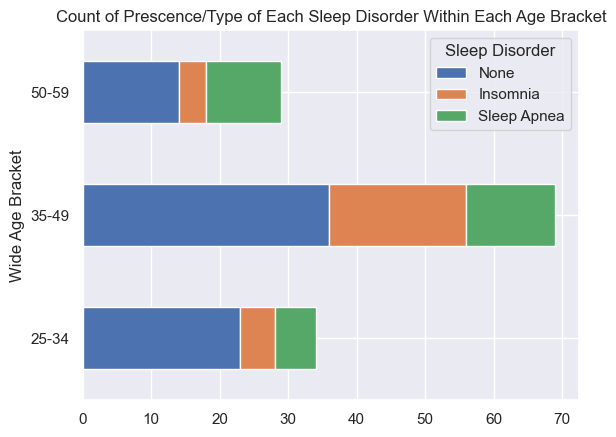

In [290]:
df.groupby('Wide Age Bracket')['Sleep Disorder'].value_counts().unstack()\
[['None', 'Insomnia', 'Sleep Apnea']]\
.plot(kind='barh', stacked=True)
plt.title("Count of Prescence/Type of Each Sleep Disorder Within Each Age Bracket");

In [300]:
# Sleeping disorders, split by gender
sd_gender_df = df.groupby('Gender')['Sleep Disorder'].value_counts().unstack()\
[['None', 'Insomnia', 'Sleep Apnea']]
sd_gender_df = sd_gender_df.astype(float)
sd_gender_df_perc = sd_gender_df.copy()

for x in range(sd_gender_df.shape[0]):
    for y in range(sd_gender_df.shape[1]):
        sd_gender_df_perc.iloc[x,y] = sd_gender_df.iloc[x,y] / (sd_gender_df.iloc[x].sum()) * 100

sd_gender_df_perc.round(2)

Sleep Disorder,None,Insomnia,Sleep Apnea
Gender,,,
Female,47.69,20.00,32.31
Male,62.69,23.88,13.43


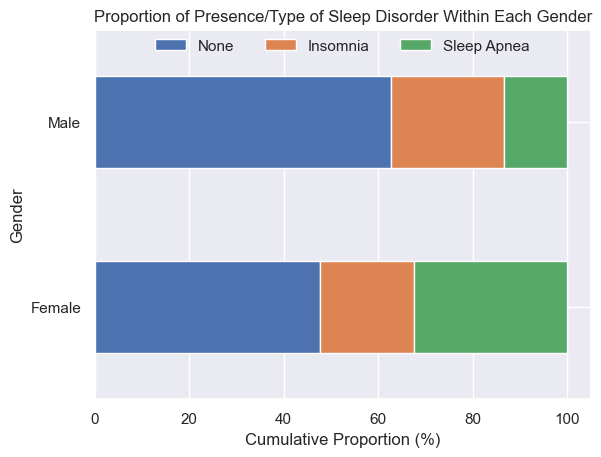

In [295]:
ax = sd_gender_df_perc.plot(kind='barh', stacked=True)
plt.title("Proportion of Presence/Type of Sleep Disorder Within Each Gender")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 0.9), ncol=3, title=None, frameon=False,)
plt.ylabel("Gender")
plt.xlabel("Cumulative Proportion (%)");